In [194]:
import gc
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm, tqdm_notebook
gc.enable()

In [195]:
BASE_DIR = os.path.abspath(os.path.curdir)
TRAIN = os.path.join(BASE_DIR, "train")

In [196]:
def read_data():
    train = pd.read_csv(os.path.join(TRAIN, 'train.csv'),
                        sep=',')
    train.sort_values(["week", "center_id", "meal_id"], ascending=True, inplace=True)
    meal_info = pd.read_csv(os.path.join(TRAIN, 'meal_info.csv'),
                            sep=',')
    fc_info = pd.read_csv(os.path.join(TRAIN, 'fulfilment_center_info.csv'),
                          sep=',')
    test = pd.read_csv(os.path.join(BASE_DIR, 'test.csv'))
    test.sort_values(["week", "center_id", "meal_id"], ascending=True, inplace=True)
    print("train records - ", train.shape)
    print("test records - ", test.shape)
    print("meal info records - ", meal_info.shape)
    print("fulfilment center records - ", fc_info.shape)
    return train, test, meal_info, fc_info


In [197]:
train_pd, test_pd, meal_info_pd, fc_info_pd = read_data()

train records -  (456548, 9)
test records -  (32573, 8)
meal info records -  (51, 3)
fulfilment center records -  (77, 5)


In [198]:
len(train_pd.center_id.unique())

77

### Number of Meals served in a center

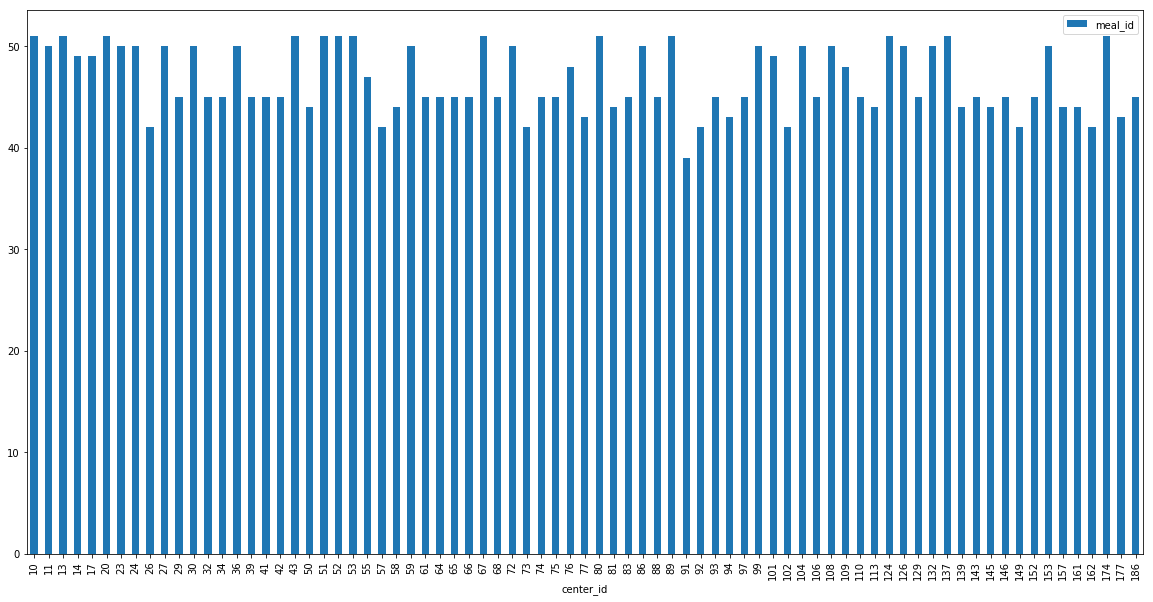

In [199]:
train_pd.groupby(["center_id"]).agg({"meal_id": pd.Series.nunique}).plot.bar(figsize=(20, 10))
plt.show()

In [200]:
center_meal_records = train_pd.groupby(["center_id", "meal_id"]).agg(
    {"week": pd.Series.nunique}) #.sort_values("week", ascending=True)
center_meal_records_lt_145 = center_meal_records[center_meal_records.week < 145]
center_meal_records_only_2yrs = center_meal_records[(center_meal_records.week > 52) & 
                                                    (center_meal_records.week < 104)]
center_meal_records_only_1yr = center_meal_records[center_meal_records.week < 52]

In [251]:
week_min_max_pd = train_pd.groupby(["center_id", "meal_id"]).agg({"week": [min, max, 'count']})
week_min_max_pd[week_min_max_pd["week"]["count"] != 145]
# week_min_max_pd[week_min_max_pd["week"]["min"] != 1]
# week_min_max_pd[week_min_max_pd["week"]["max"] != 145]

week           
                   min  max count
center_id meal_id                
10        1207       1  145   144
          1216       1  145   143
          1247       1  145   122
          1438       1  145   143
          1525       1  145   137
          1558       1  145   144
          1571      64  145    82
          1770       1  145   144
          1847       1  145   122
          1902       1  145   143
          2104     112  145    34
          2126       1  145   143
          2304       1  145   142
          2490      23  145   123
          2494       1  145   142
          2569      27  145   119
          2664      17  145   128
          2704       1  145   138
          2956      64  145    82
11        1198       1  145   144
          1207       1  145   142
          1216       1  145   138
          1230       1  145   144
          1247       1  145   101
          1248       1  145   142
          1438       1  145   141
          1445       1  145   140
          1525       1  145   137
          1543       1  145   137
          1558       1  145   144
...                ...  ...   ...
186       1247       1  145    77
          1248       1  144   131
          1445       1  145   123
          1525       1  145   110
          1543       1  145   118
          1558       1  145   144
          1571      59  145    77
          1770      16  145    70
          1878       1  145   143
          1902       1  143    64
          2104      59  144    66
          2126       1  143   131
          2139       1  145   109
          2304       1  145   113
          2306       1  145    93
          2322       1  145   144
          2444       1  144   117
          2490      29  145   117
          2492       1  145   129
          2539       1  145   144
          2569      19  145   127
          2577       2  143    44
          2581       1  145   144
          2631       1  145   138
          2664      14  145   131
          2704       3  145   138
          2760       1  145   141
          2826       1  145   143
          2867       3  145    99
          2956      59  116    45

[2350 rows x 3 columns]

### Num of Weeks histogram for the data avaiilable for Center-Meal combination

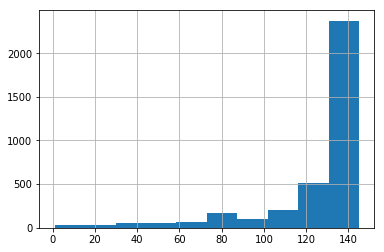

In [201]:
center_meal_records.week.hist(bins=10)

### Num of meals having only 1 year of data by centers

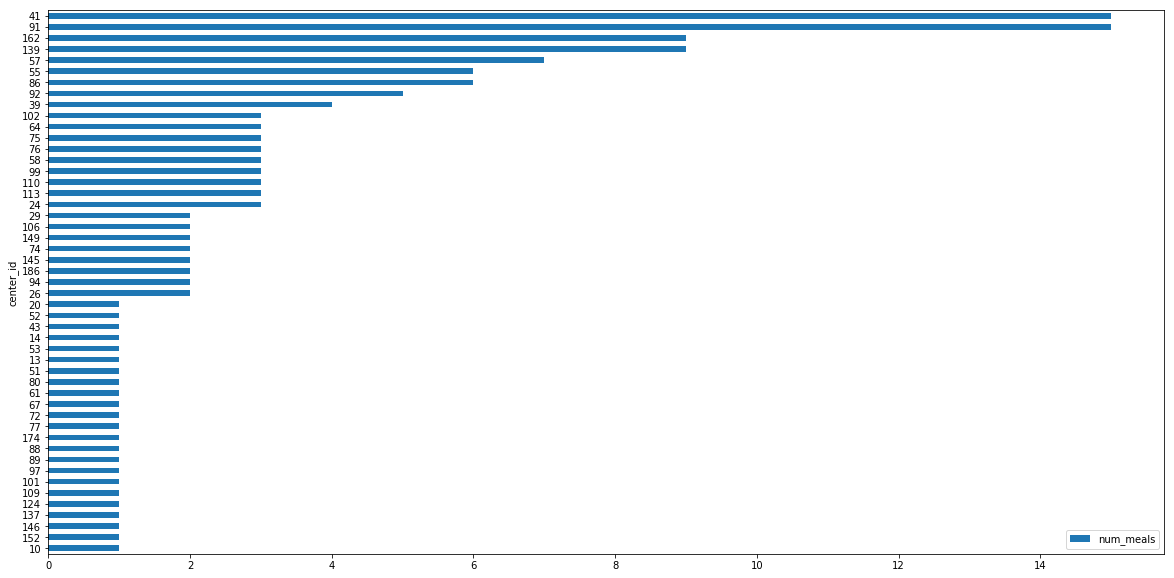

In [202]:
center_meal_records_only_1yr.groupby(level=0).count().rename(
    columns={"week": "num_meals"}).sort_values("num_meals").plot.barh(figsize=(20, 10))

### Number of Center -Meal combination having less than 1 year of data

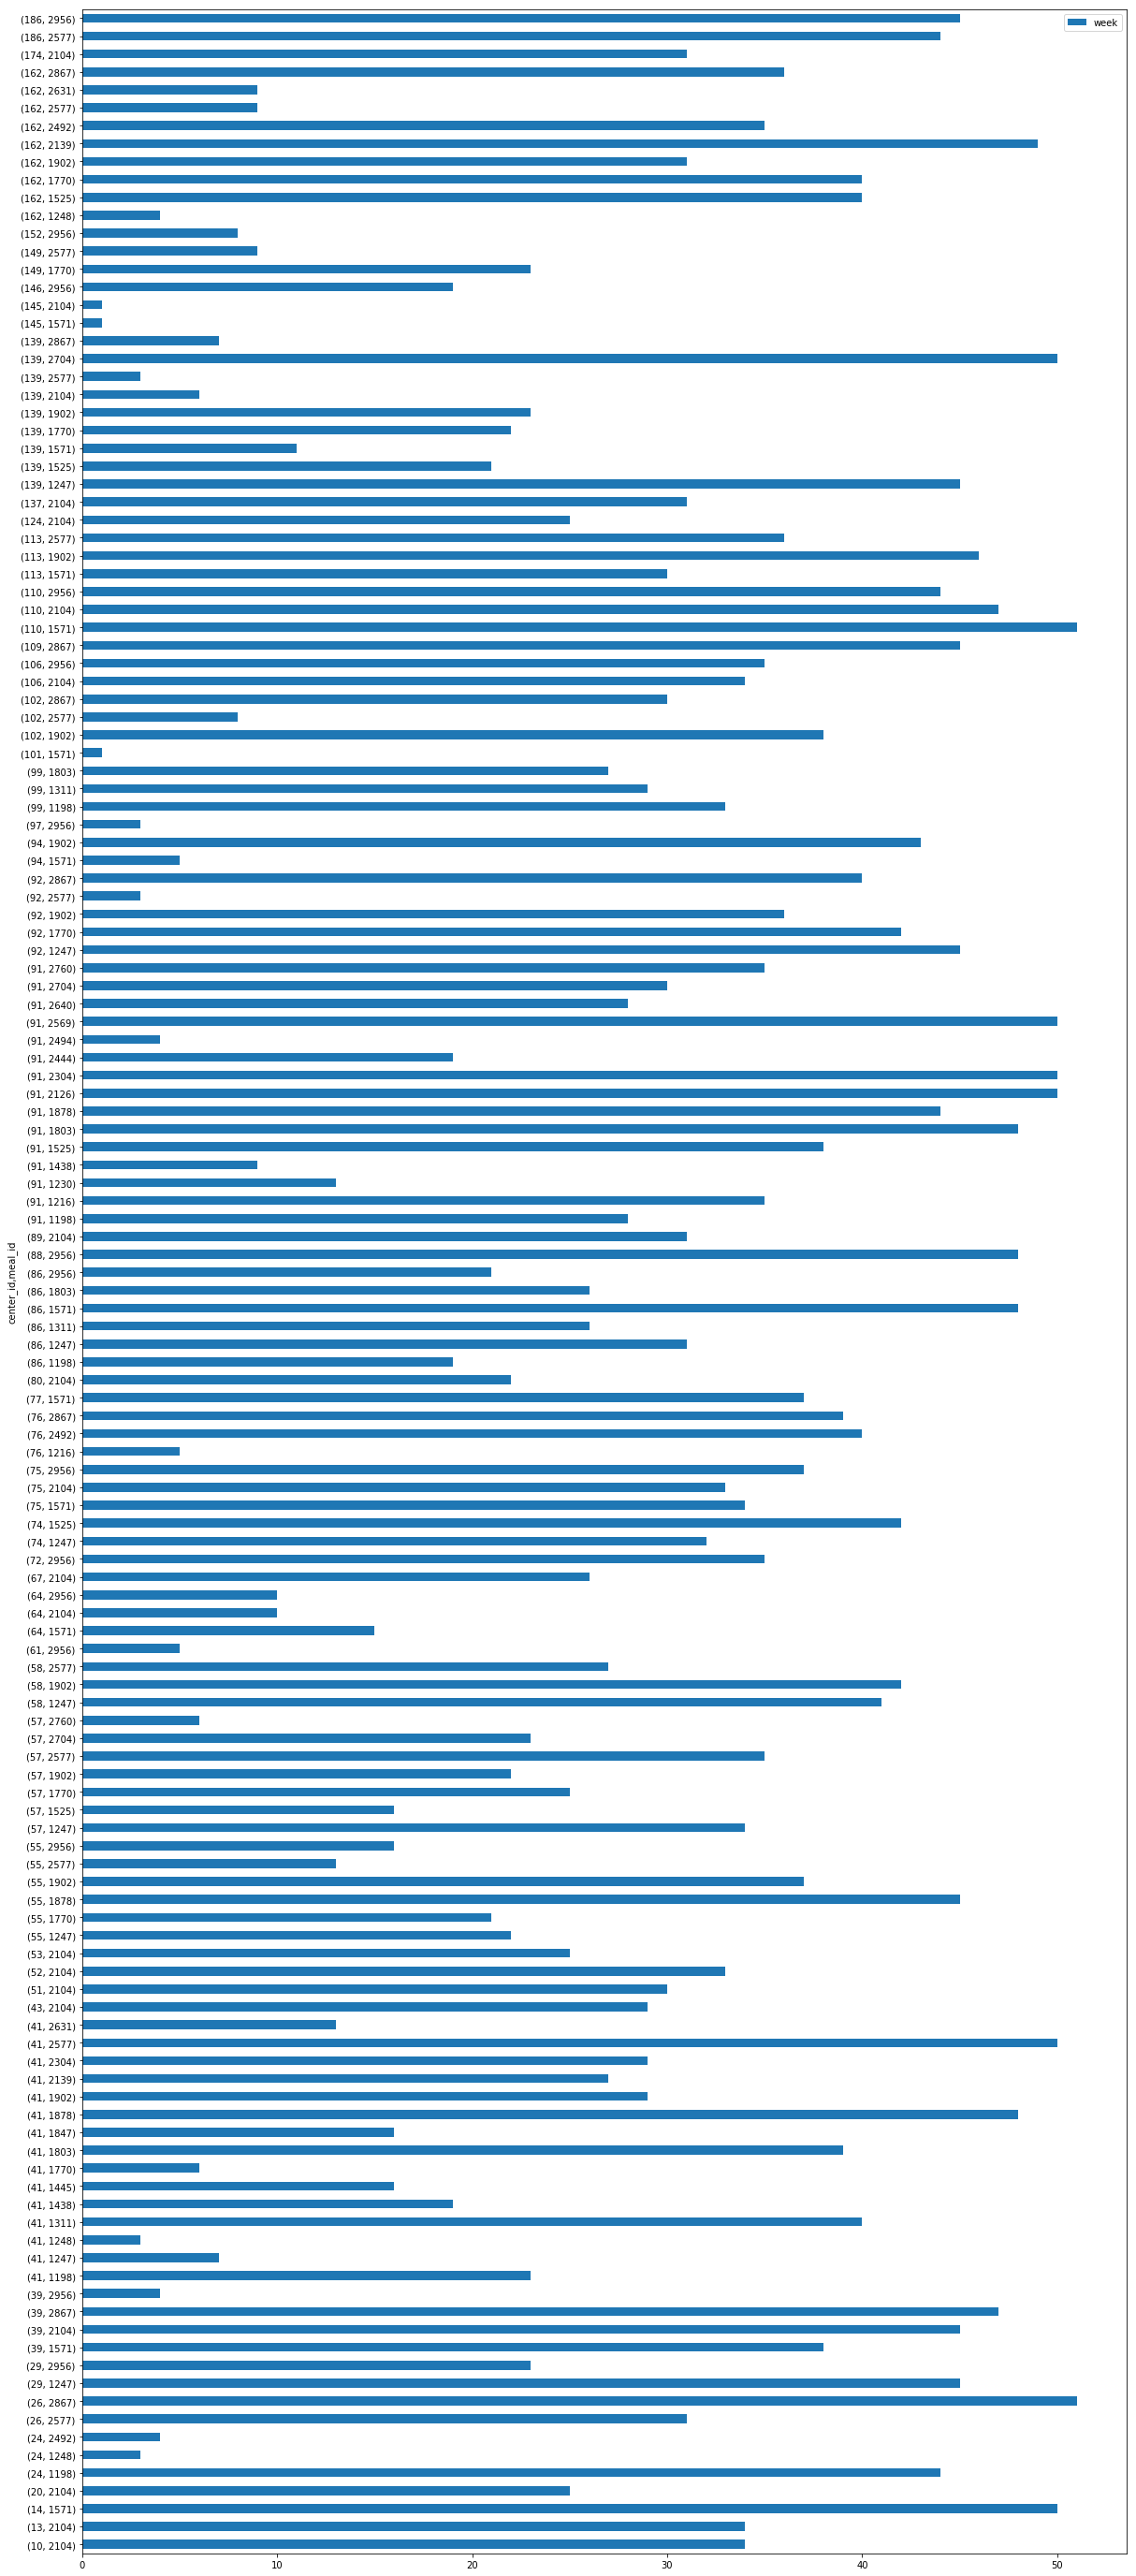

In [203]:
center_meal_records_only_1yr.plot.barh(figsize=(20, 50))

### Num of meals having only 2 years of data by centers

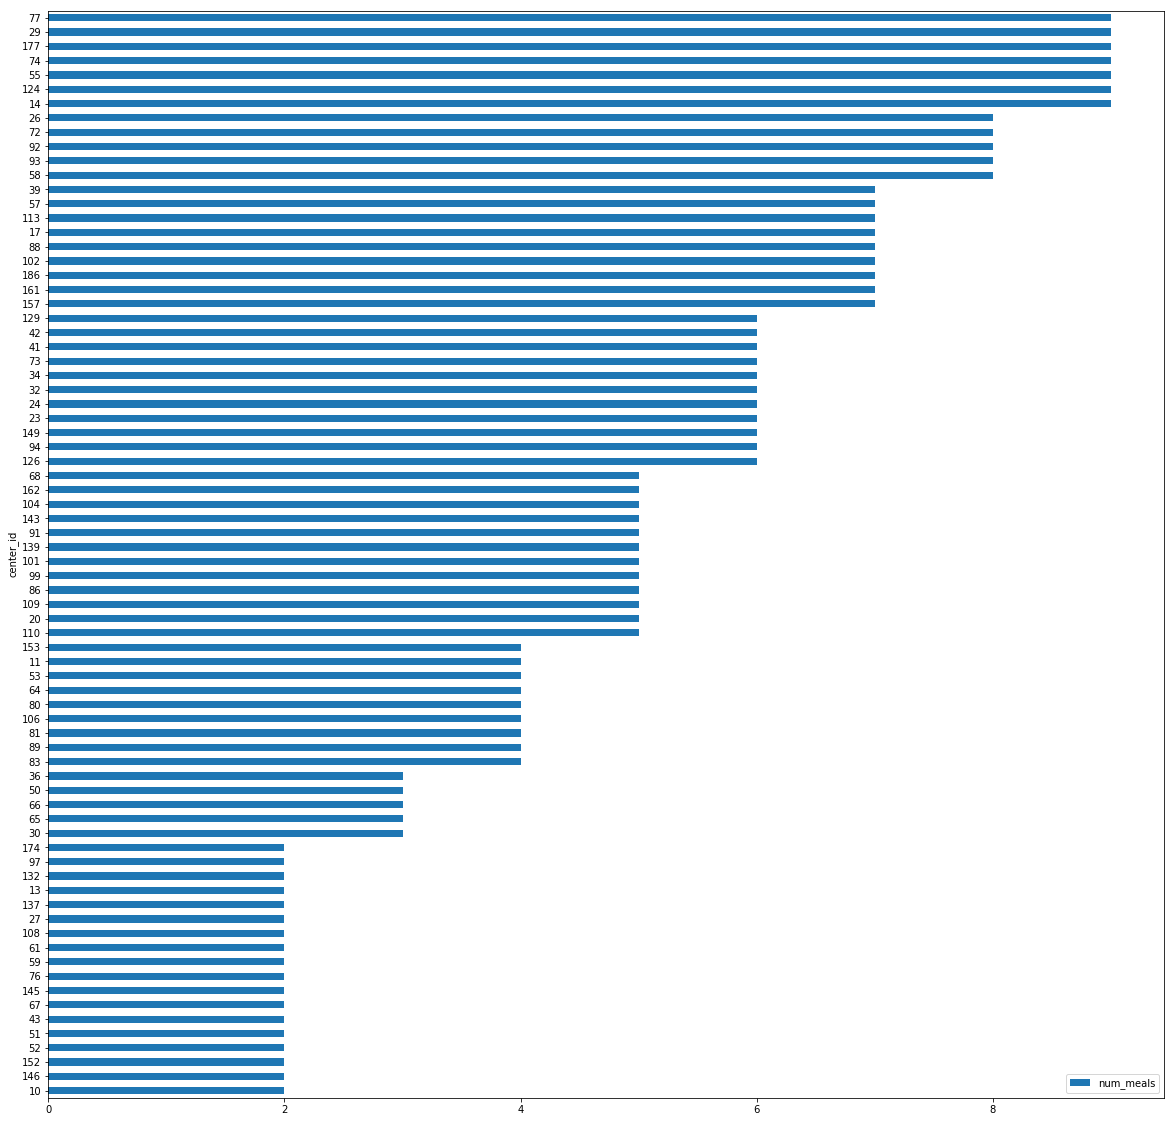

In [204]:
center_meal_records_only_2yrs.groupby(level=0).count().rename(
    columns={"week": "num_meals"}).sort_values("num_meals").plot.barh(figsize=(20, 20))

### Number of Center -Meal combination having less than 2 year of data

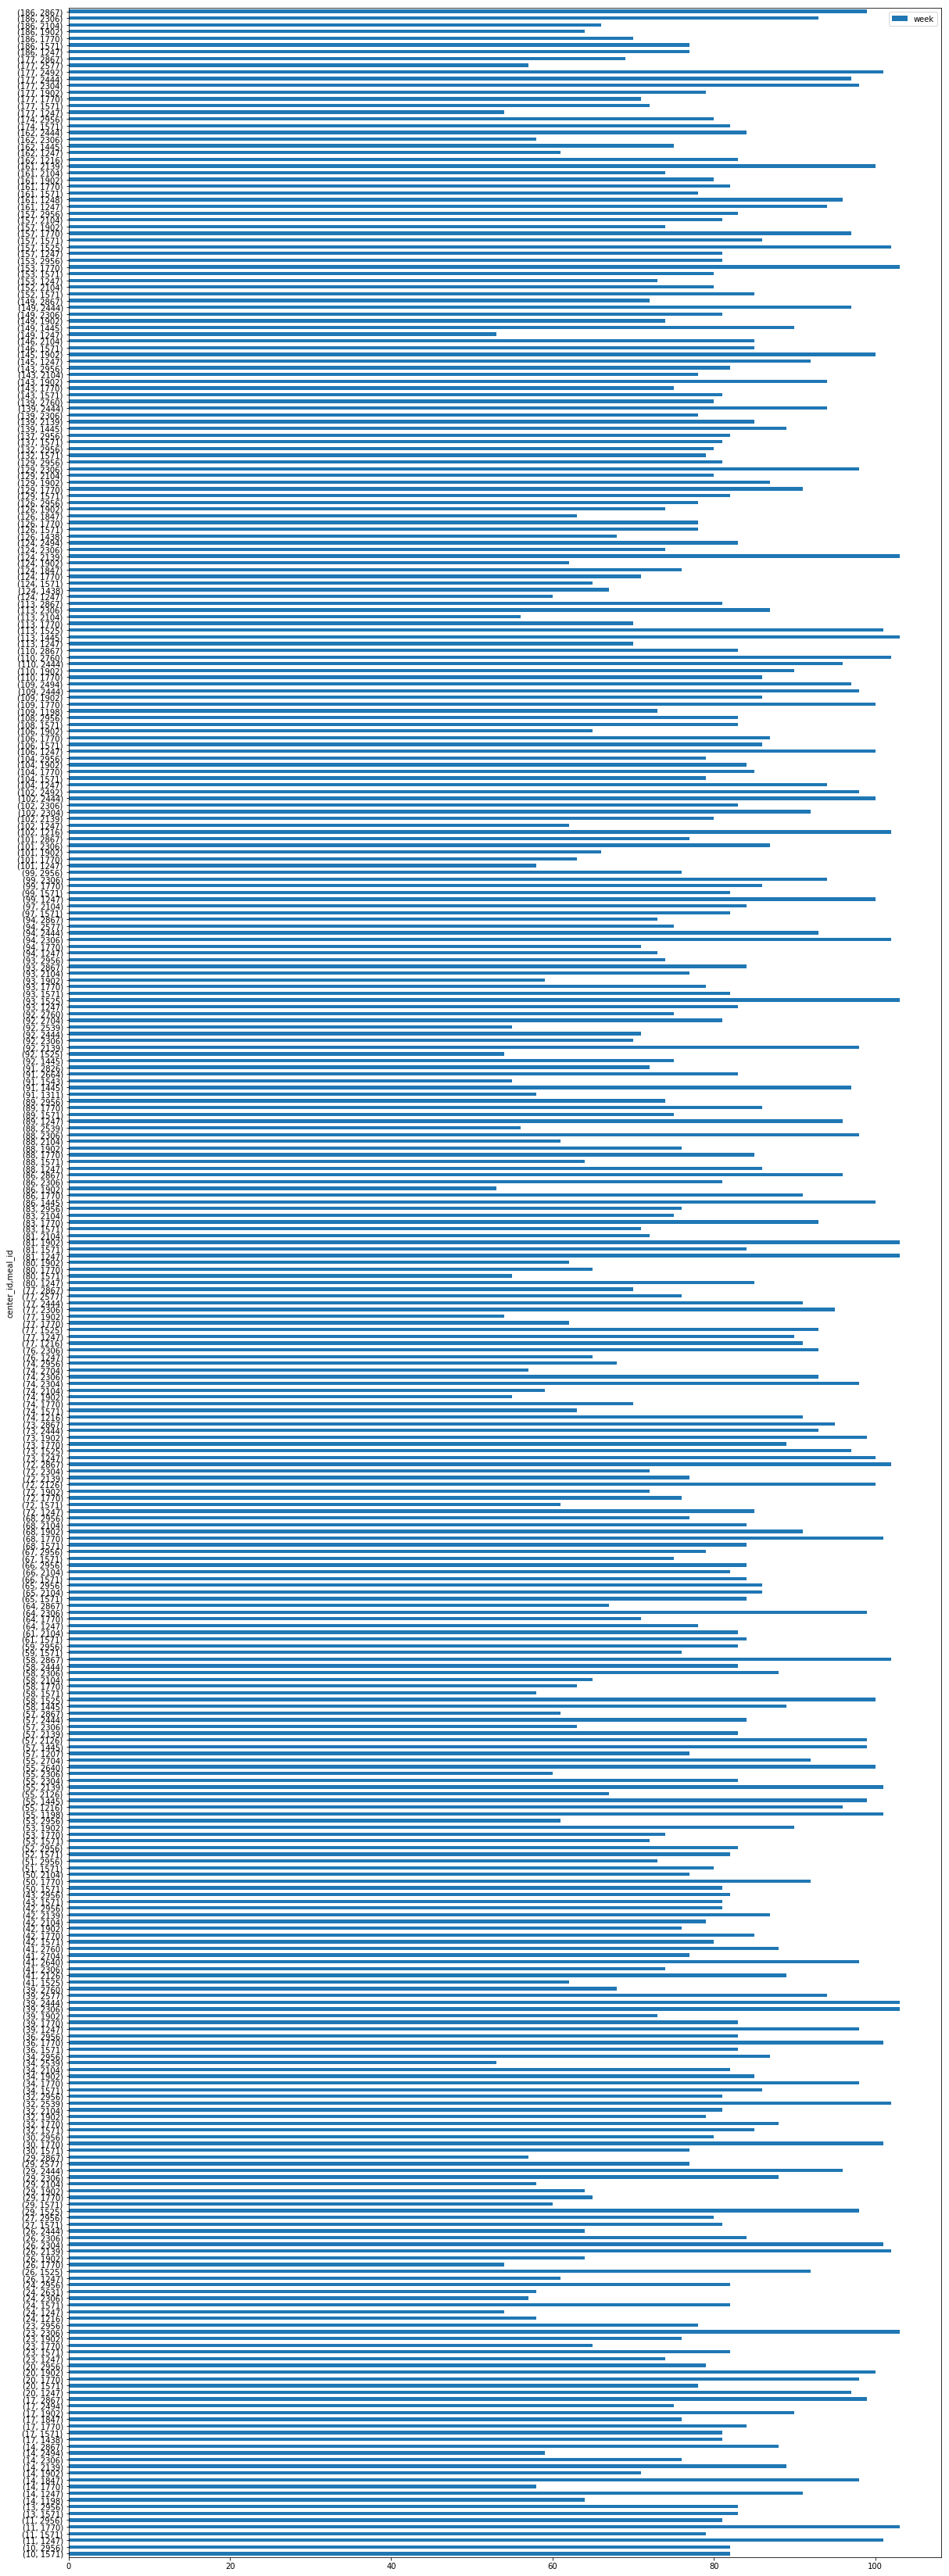

In [205]:
center_meal_records_only_2yrs.plot.barh(figsize=(20, 60))

### Visualizing trends for the meal and center num_orders and Promotions flag

In [206]:

def plot_center_meal(data_pd, center_id, meal_id):
    train_center = data_pd[(data_pd.center_id == center_id) & 
                           (data_pd.meal_id == meal_id)].copy().reset_index(drop=True)

    train_center.loc[:, "num_orders_mean"] = train_center.num_orders.mean()

    plt.figure(1, figsize=(20, 20))
    plt.subplot(3,1,1)
    train_center[["num_orders", "num_orders_mean"]].plot(ax=plt.gca())
    plt.subplot(3,1,2)
    train_center[["base_price", "checkout_price"]].plot(ax=plt.gca())
    plt.subplot(3,1,3)
    train_center[["emailer_for_promotion", "homepage_featured"]].plot(ax=plt.gca())
    plt.show()
# plt.subplot(2,2,3)
# df.C.plot(ax=plt.gca())

For center -  10


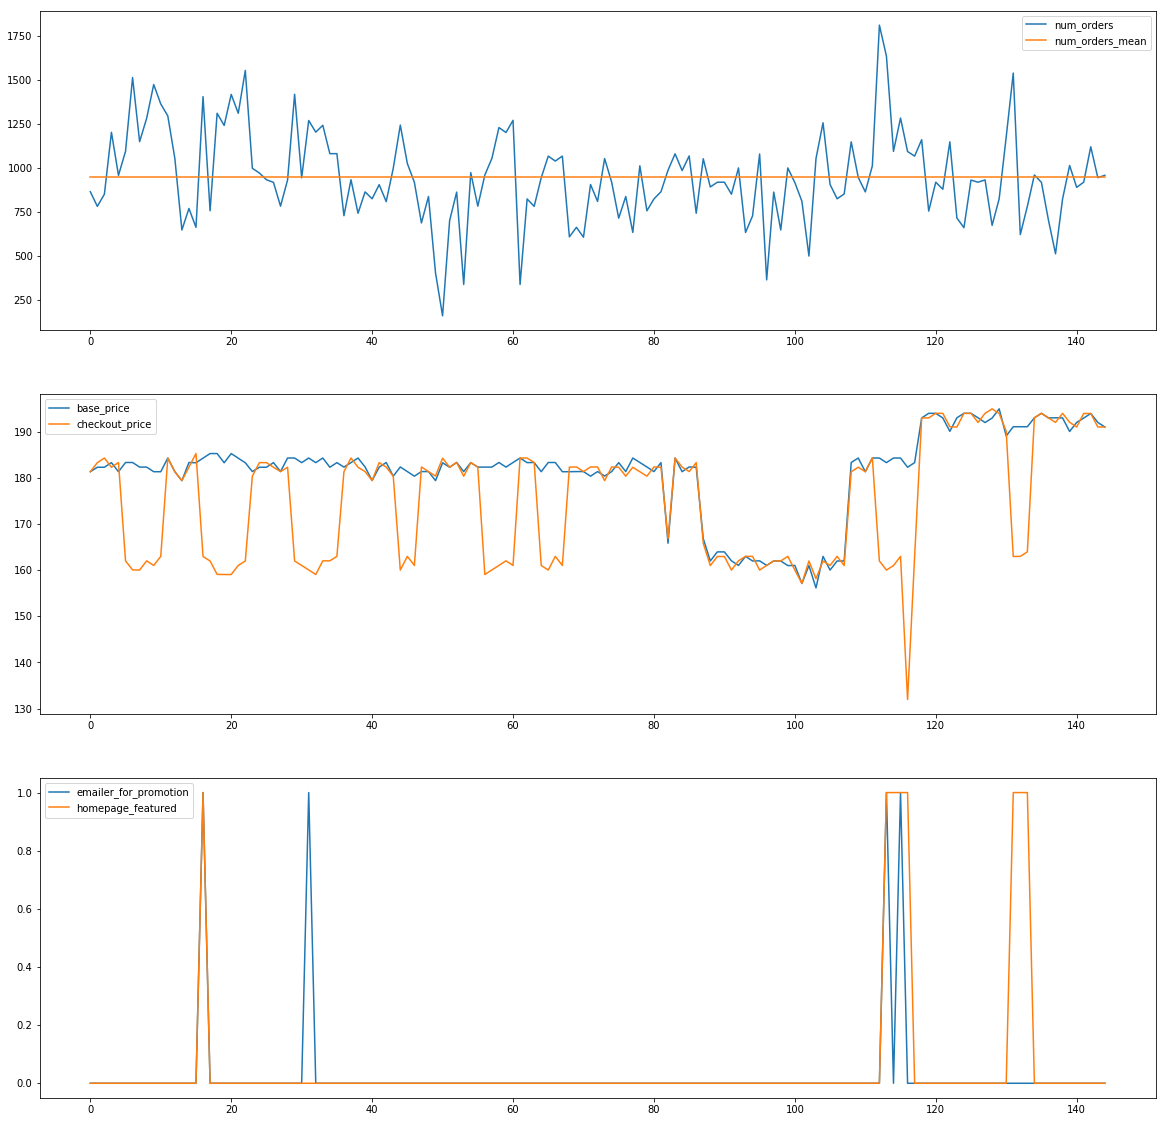

For center -  11


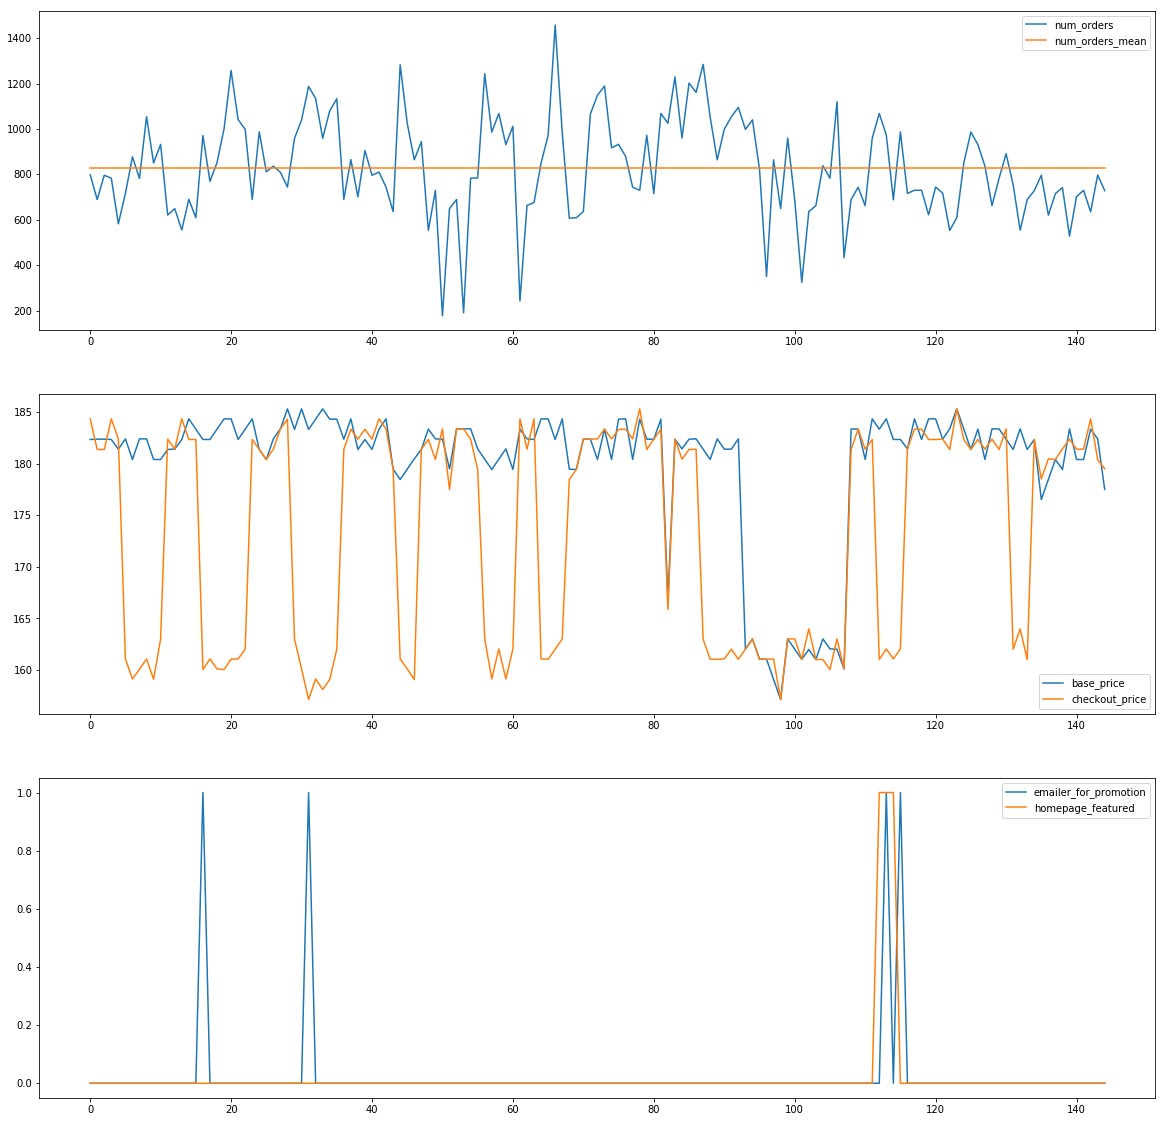

For center -  13


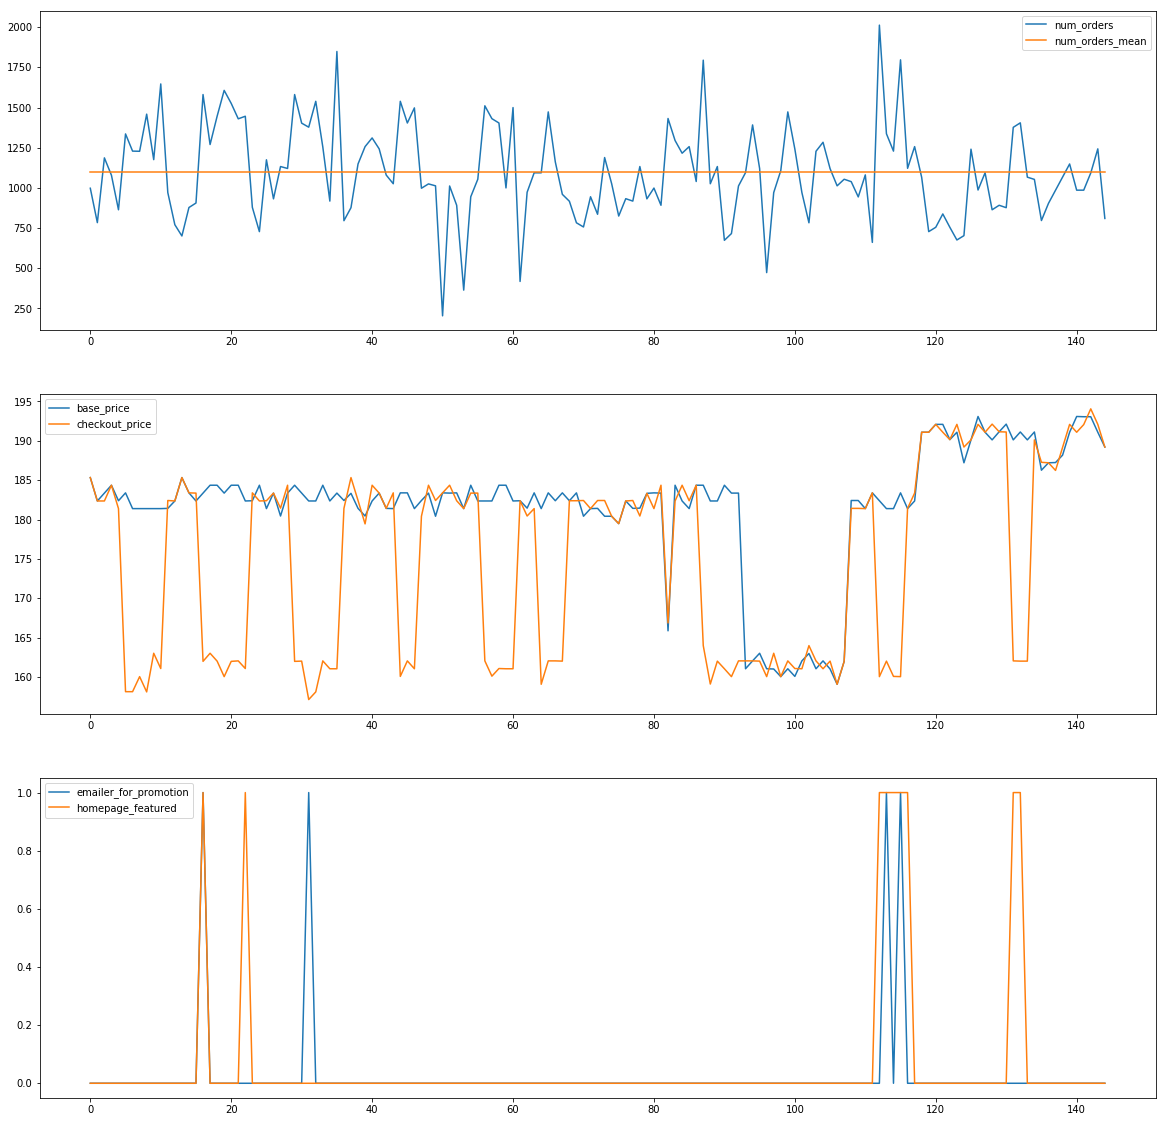

For center -  14


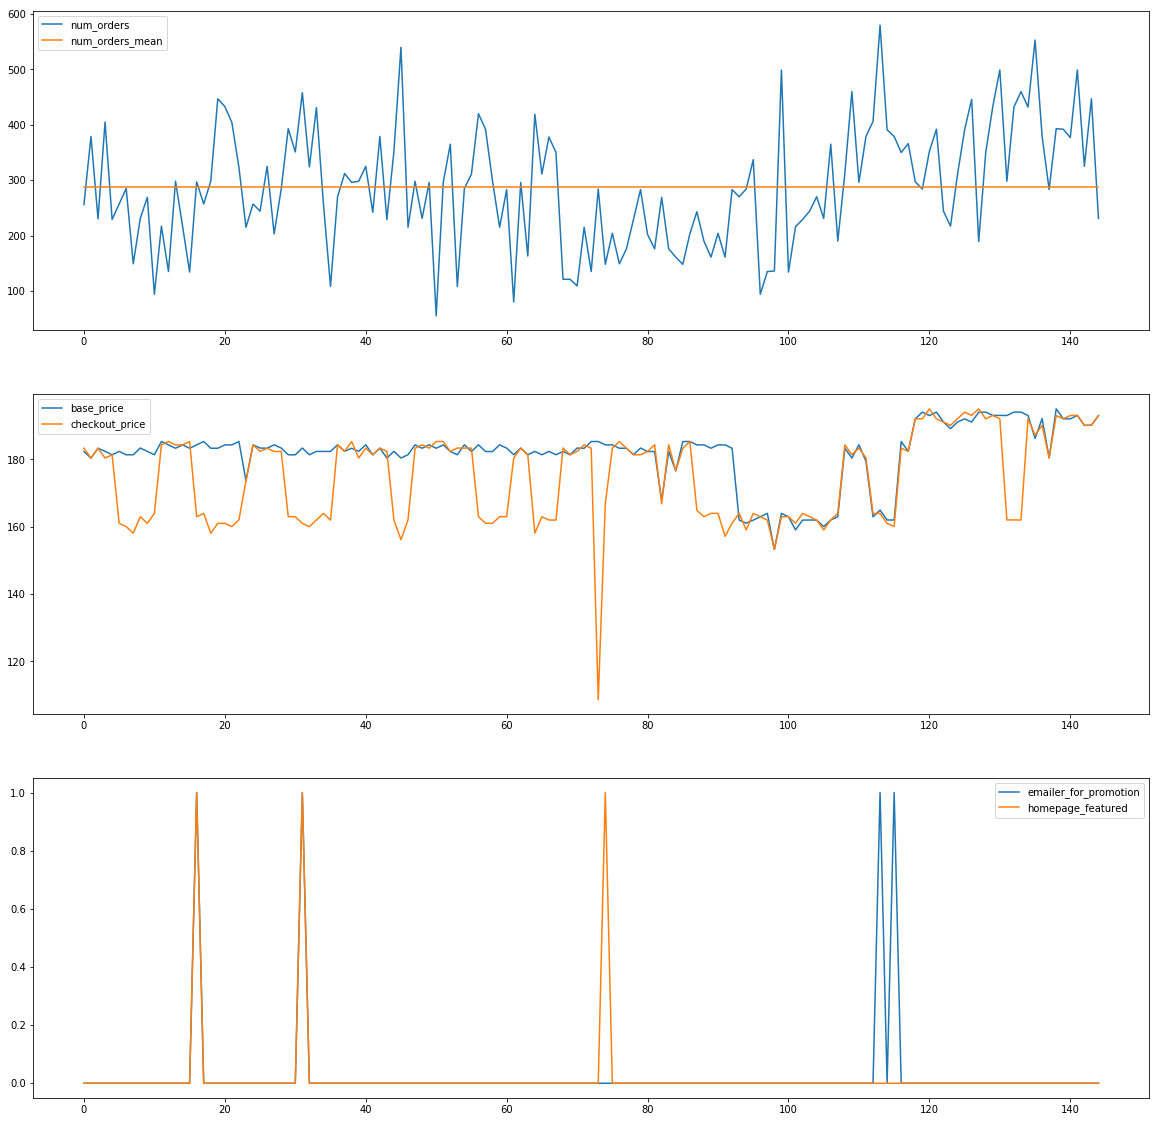

For center -  17


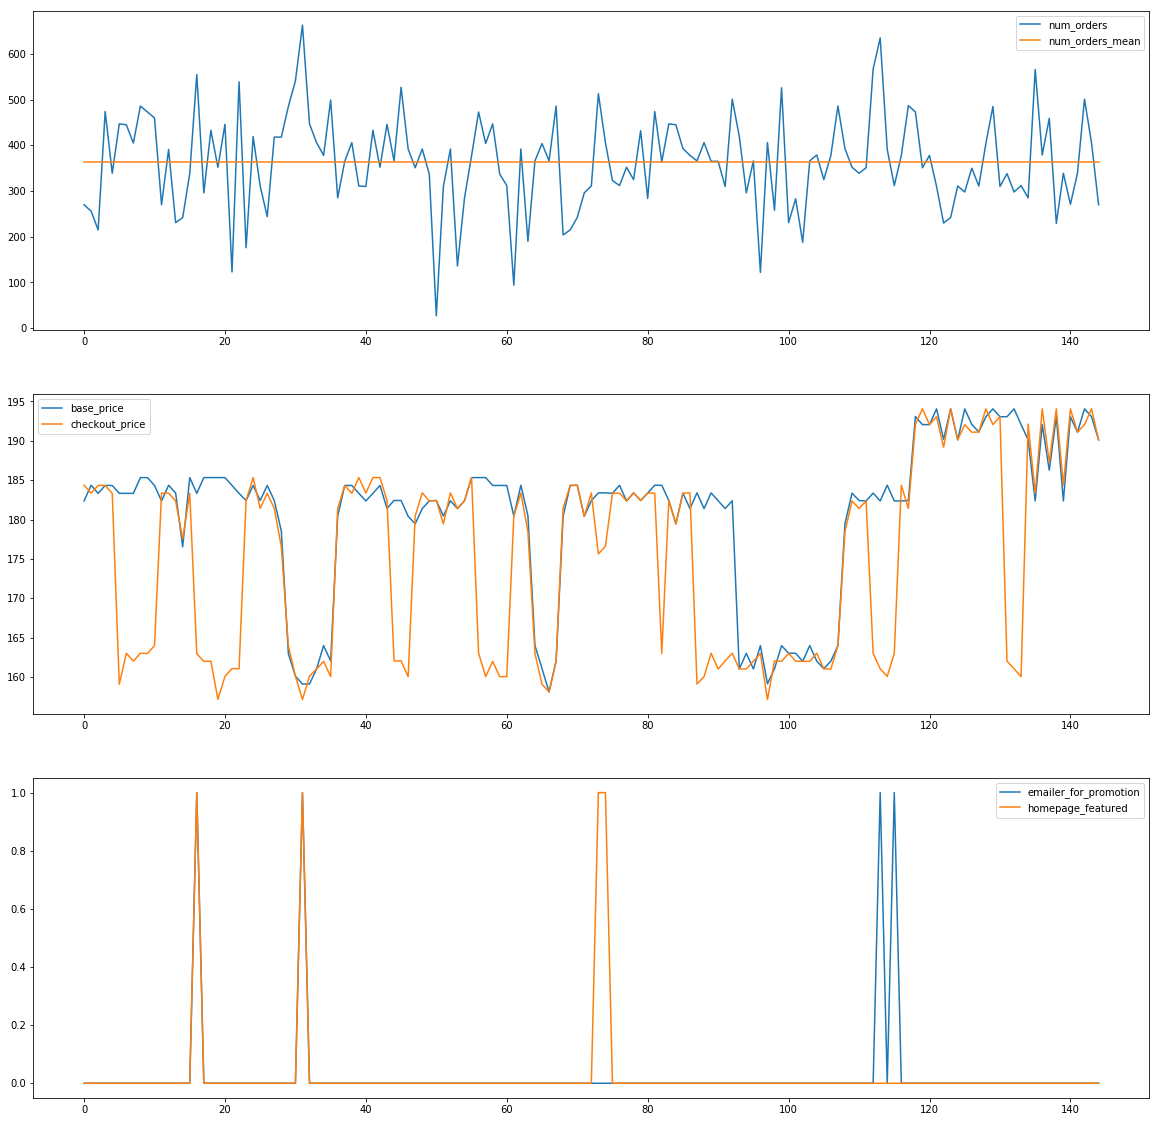

For center -  20


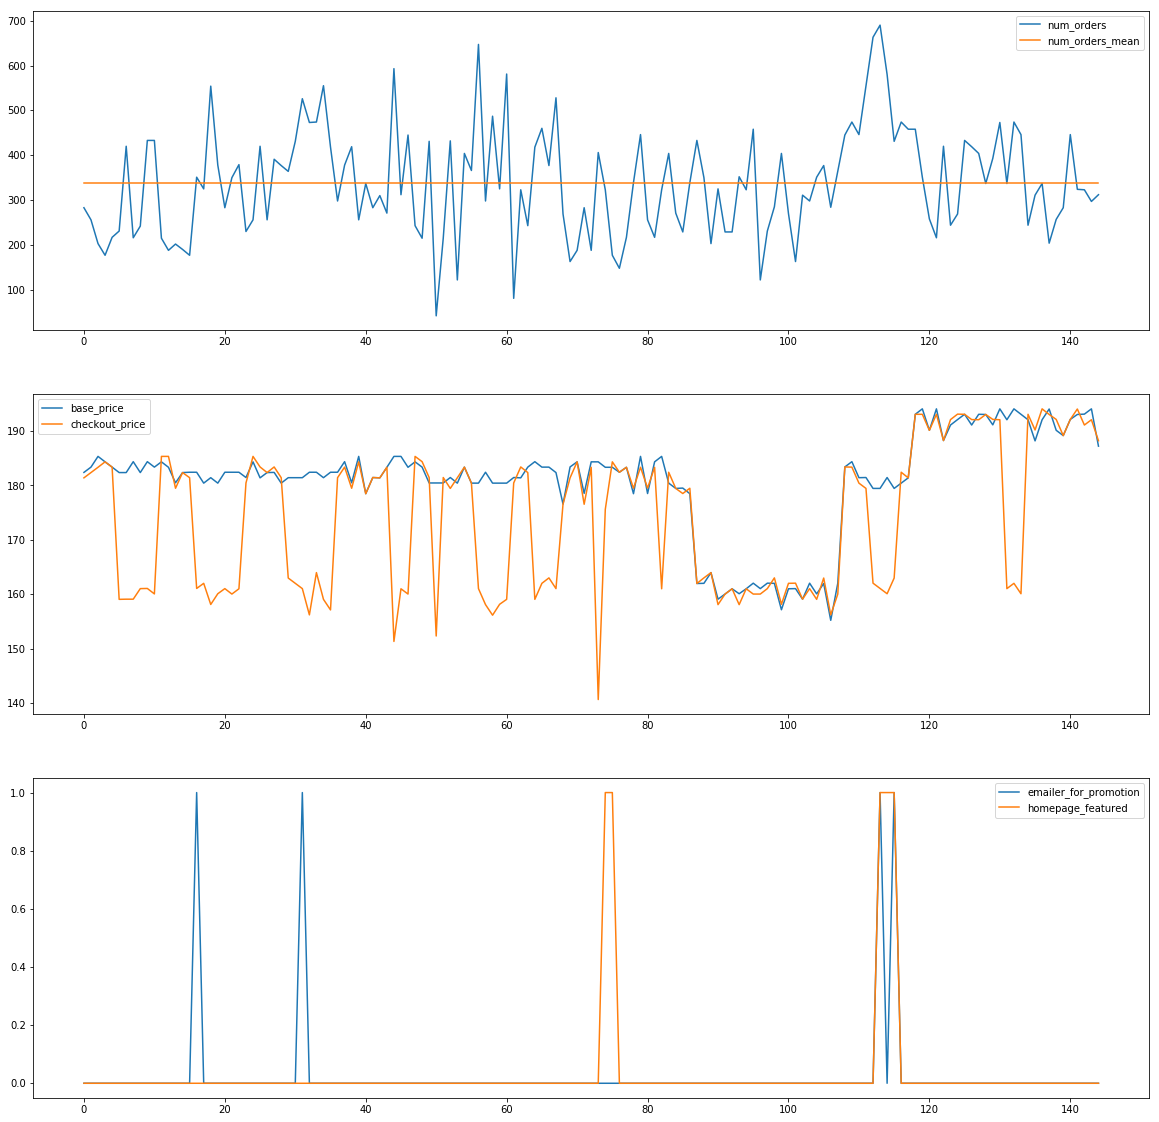

For center -  23


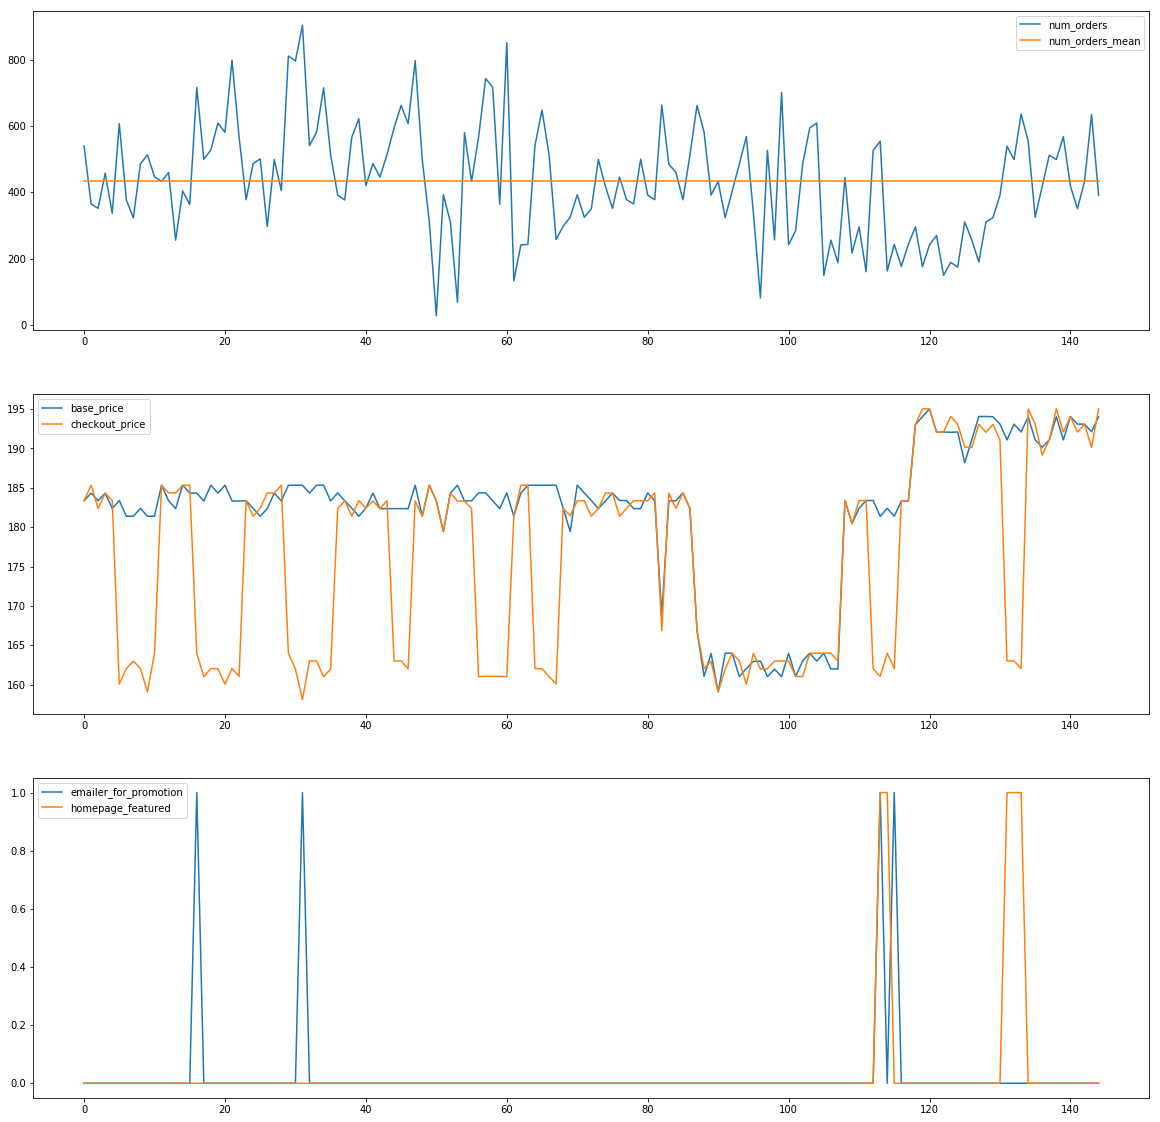

For center -  24


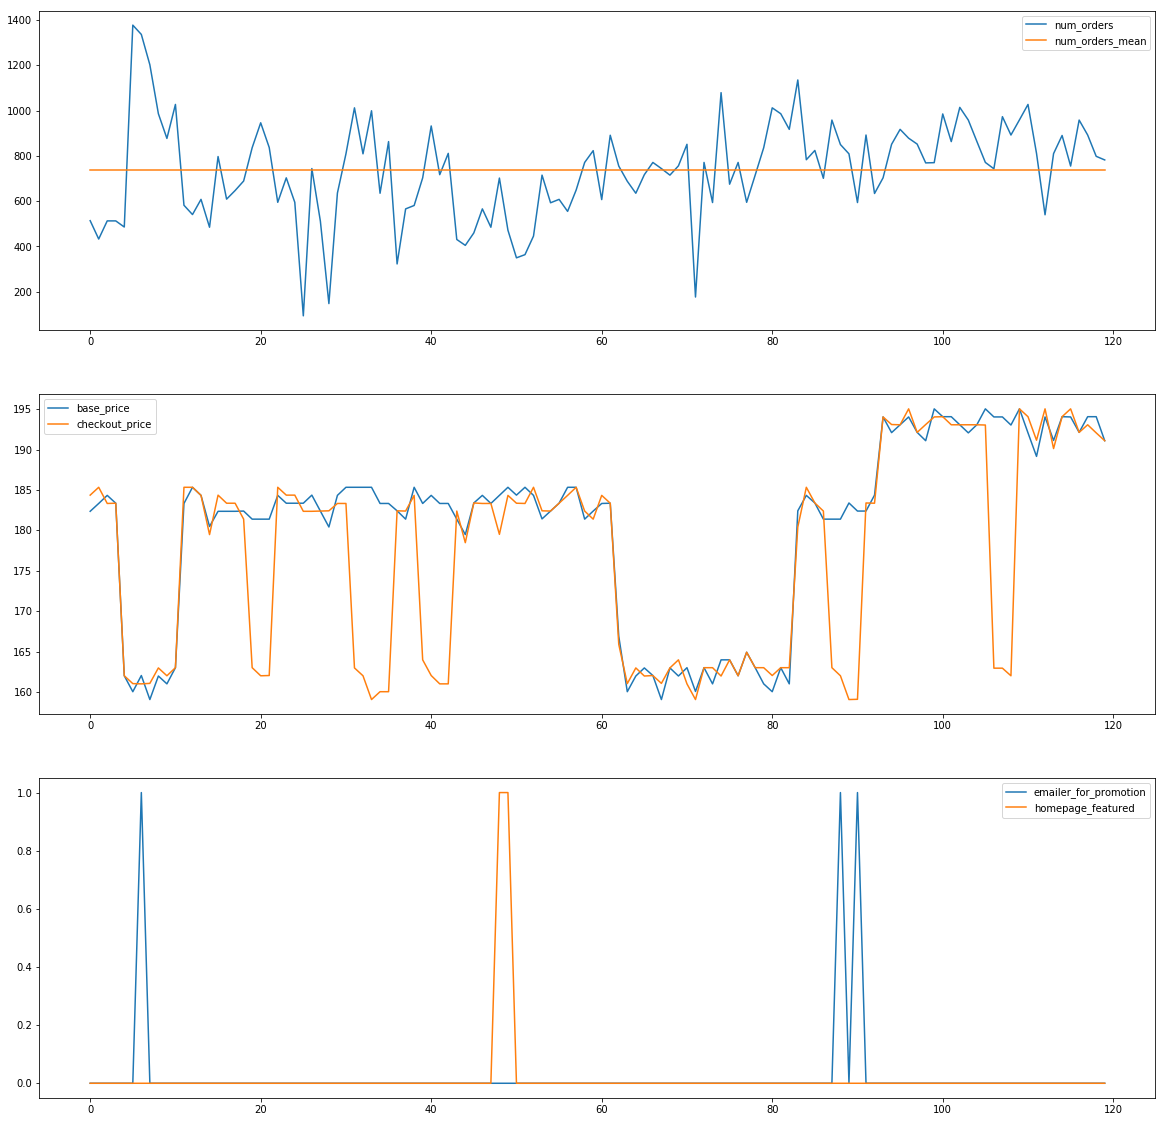

For center -  26


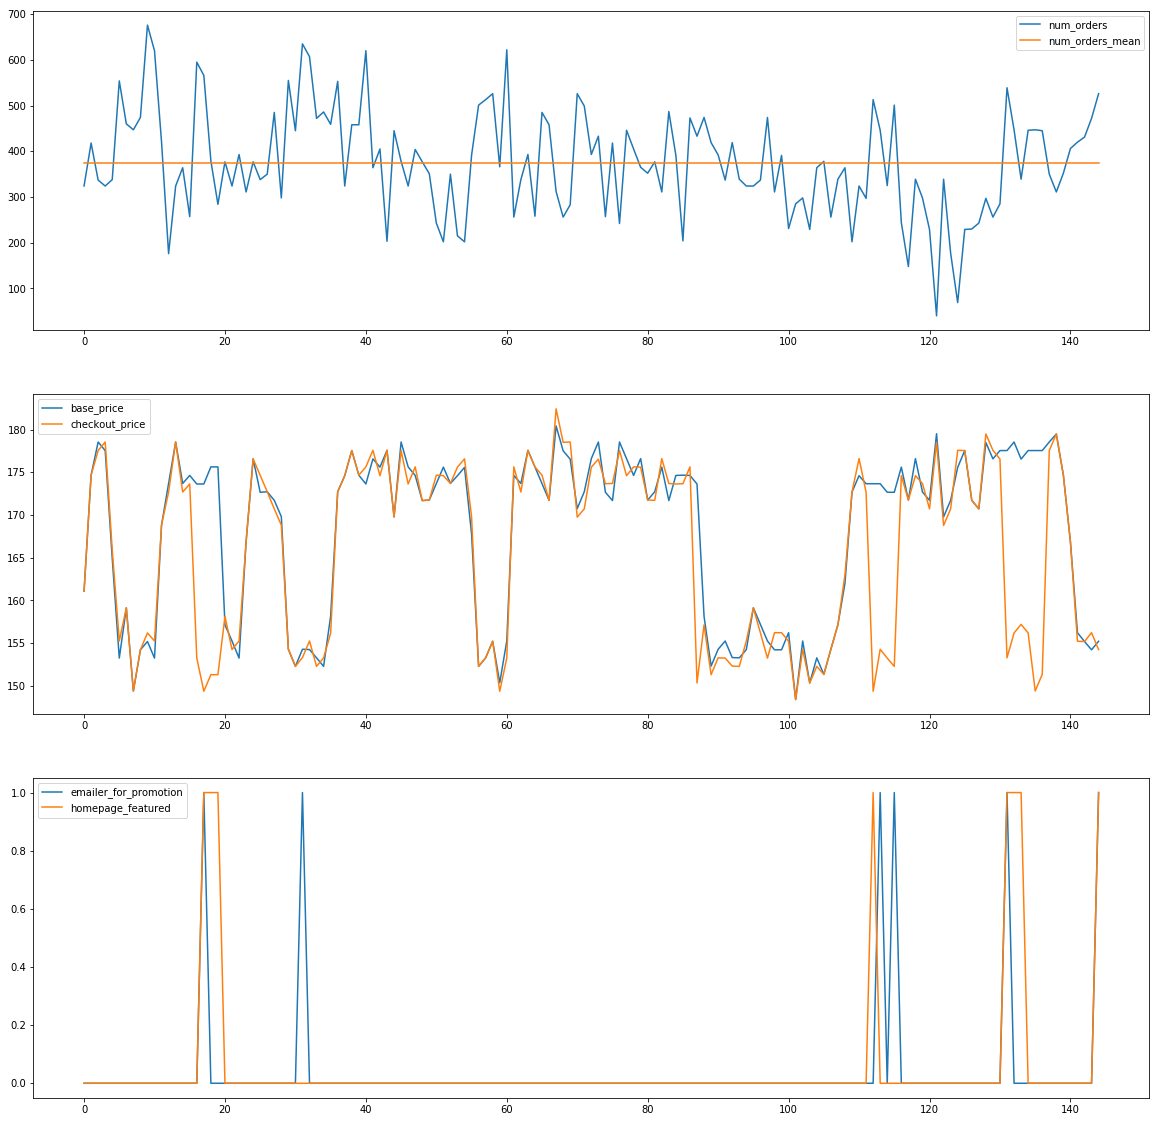

For center -  27


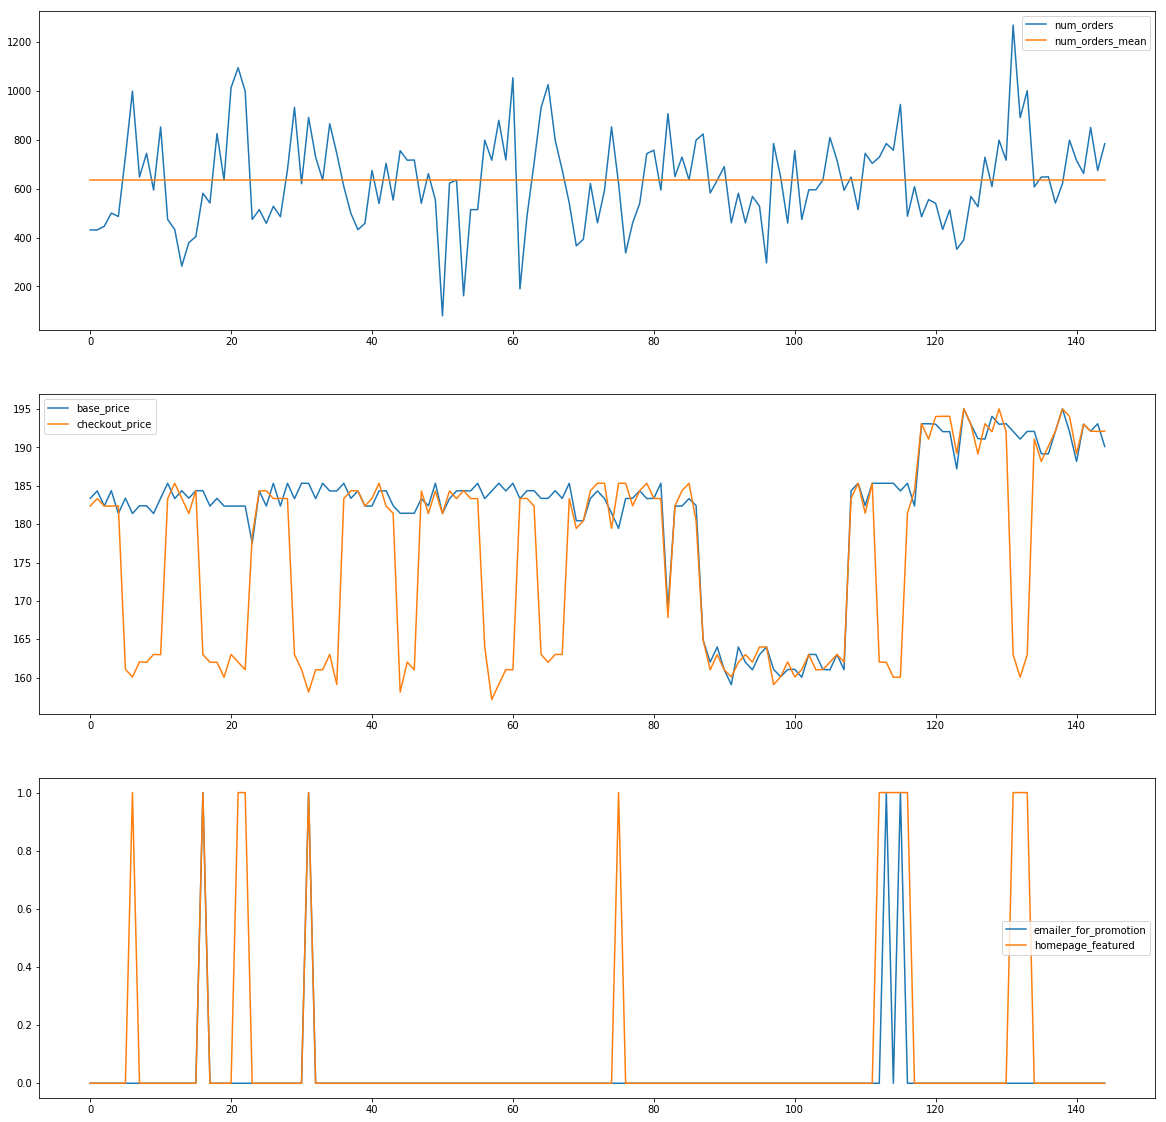

In [207]:
center_id = 10
meal_id = 1062
for center in train_pd.center_id.unique()[:10]:
    print("For center - ", center)
    plot_center_meal(train_pd, center, meal_id)

In [208]:
train_pd.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [209]:
train_pd.loc[:, "email_homepage_feat_both"] = ((train_pd.emailer_for_promotion + train_pd.homepage_featured) == 2).astype('int')

In [210]:
train_pd.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'email_homepage_feat_both'],
      dtype='object')

### Avg. increase in orders & avg change in price decrease when there is emailer for promotion

In [211]:
center_id = 10
meal_id = 1062
train_center = train_pd[(train_pd.center_id == center_id) & 
                        (train_pd.meal_id == meal_id)].copy().reset_index(drop=True)


In [212]:
train_center.sort_values(["center_id", "meal_id", "week"], ascending=True, inplace=True)

In [213]:
train_center.loc[:, "price_change"] = np.abs(train_pd.base_price - train_pd.checkout_price)

In [214]:
train_center.loc[:, "num_order_change_by1"] = np.abs(train_center.num_orders - \
                                                     train_center.groupby(["center_id", "meal_id"])["num_orders"].shift(1))
train_center.loc[:, "price_change_by1"] = np.abs(train_center.price_change - \
                                                 train_center.groupby(["center_id", "meal_id"])["price_change"].shift(1))

In [215]:
print(train_center.loc[train_center.emailer_for_promotion == 1, ["num_order_change_by1"]].mean())

print(train_center.loc[train_center.homepage_featured == 1, ["num_order_change_by1"]].mean())

print(train_center.loc[train_center.email_homepage_feat_both == 1, ["num_order_change_by1"]].mean())

num_order_change_by1    357.75
dtype: float64
num_order_change_by1    409.25
dtype: float64
num_order_change_by1    368.666667
dtype: float64


In [216]:
print(train_center.loc[train_center.emailer_for_promotion == 1, ["price_change_by1"]].mean())

print(train_center.loc[train_center.homepage_featured == 1, ["price_change_by1"]].mean())

print(train_center.loc[train_center.email_homepage_feat_both == 1, ["price_change_by1"]].mean())

price_change_by1    25.0075
dtype: float64
price_change_by1    22.08625
dtype: float64
price_change_by1    33.343333
dtype: float64


In [217]:
train_center.loc[train_center.emailer_for_promotion == 1, 
                 ["center_id", "meal_id","num_order_change_by1", "price_change_by1"]].groupby(
    ["center_id", "meal_id"]).agg({"num_order_change_by1": ["mean", "count"], 
                                   "price_change_by1": ["mean", "count"]})

num_order_change_by1       price_change_by1      
                                  mean count             mean count
center_id meal_id                                                  
10        1062                  357.75     4          25.0075     4

In [218]:
train_center.loc[train_center.homepage_featured == 1, 
                 ["center_id", "meal_id","num_order_change_by1", "price_change_by1"]].groupby(
    ["center_id", "meal_id"]).agg({"num_order_change_by1": ["mean", "count"], 
                                   "price_change_by1": ["mean", "count"]})

num_order_change_by1       price_change_by1      
                                  mean count             mean count
center_id meal_id                                                  
10        1062                  409.25     8         22.08625     8

In [219]:
train_center.loc[train_center.email_homepage_feat_both == 1, 
                 ["center_id", "meal_id","num_order_change_by1", "price_change_by1"]].groupby(
    ["center_id", "meal_id"]).agg({"num_order_change_by1": ["mean", "count"], 
                                   "price_change_by1": ["mean", "count"]})

num_order_change_by1       price_change_by1      
                                  mean count             mean count
center_id meal_id                                                  
10        1062              368.666667     3        33.343333     3

### Creating Week - Month & year map 

In [220]:
start_week = train_pd.week.min()
end_week = test_pd.week.max()
print("Train range weeks - {} to {}".format(start_week, train_pd.week.max()))
print("Test range weeks - {} to {}".format(test_pd.week.min(), end_week))

Train range weeks - 1 to 145
Test range weeks - 146 to 155


In [221]:
week_map_pd = pd.DataFrame.from_dict({"week": np.arange(start_week, end_week + 1, 1)})

In [222]:
week_map_pd.loc[:, "month"] = week_map_pd.week.map(lambda x: np.ceil(x/4))
week_map_pd.loc[:, "quarter"] = week_map_pd.week.map(lambda x: np.ceil(x/13))

In [223]:
week_map_pd.head()

,week,month,quarter
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,2.0,1.0


### Joining train data with meal and center_info

In [224]:
train_pd = pd.merge(train_pd, meal_info_pd, on="meal_id", how="left")
train_pd = pd.merge(train_pd, fc_info_pd, on="center_id", how="left")

In [225]:
train_pd.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'email_homepage_feat_both', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area'],
      dtype='object')

### Integrating Features with full dataFrame

In [229]:
train_pd.sort_values(["center_id", "meal_id", "week"], 
                     ascending=True, 
                     inplace=True)
train_pd.reset_index(drop=True, inplace=True)

In [234]:
train_pd.loc[:, "price_change"] = np.abs(train_pd.base_price - train_pd.checkout_price)
train_pd.loc[:, "num_order_change_by1"] = np.abs(train_pd.num_orders - \
                                                 train_pd.groupby(["center_id", "meal_id"])["num_orders"].shift(1))
train_pd.loc[:, "price_change_by1"] = np.abs(train_pd.price_change - \
                                             train_pd.groupby(["center_id", "meal_id"])["price_change"].shift(1))

In [235]:
train_pd.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'email_homepage_feat_both', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area', 'price_change',
       'num_order_change_by1', 'price_change_by1'],
      dtype='object')

In [256]:
train_pd.loc[train_pd.emailer_for_promotion == 1, 
                 ["center_id", "meal_id","num_order_change_by1", "price_change_by1"]].groupby(
    ["center_id", "meal_id"]).agg({"num_order_change_by1": ["mean", "count"], 
                                   "price_change_by1": ["mean", "count"]})
# .isnull().sum()

num_order_change_by1  mean     0
                      count    0
price_change_by1      mean     0
                      count    0
dtype: int64

In [264]:
temp = train_pd.loc[train_pd.homepage_featured == 1, 
                 ["center_id", "meal_id","num_order_change_by1", "price_change_by1"]].groupby(
    ["center_id", "meal_id"]).agg({"num_order_change_by1": ["mean", "count"], 
                                   "price_change_by1": ["mean", "count"]})
temp.isnull().sum()

num_order_change_by1  mean     2
                      count    0
price_change_by1      mean     2
                      count    0
dtype: int64

In [265]:
temp[temp["num_order_change_by1"]["mean"].isnull()]

num_order_change_by1       price_change_by1      
                                  mean count             mean count
center_id meal_id                                                  
126       1770                     NaN     0              NaN     0
129       2707                     NaN     0              NaN     0

In [266]:
train_pd.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'email_homepage_feat_both', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area', 'price_change',
       'num_order_change_by1', 'price_change_by1'],
      dtype='object')

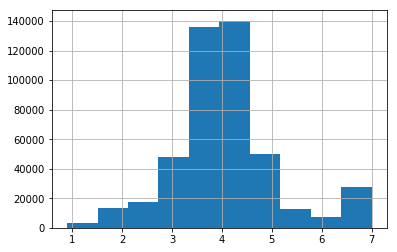

In [271]:
train_pd.op_area.hist()

In [269]:
train_pd.op_area.describe()

count    456548.000000
mean          4.083590
std           1.091686
min           0.900000
25%           3.600000
50%           4.000000
75%           4.500000
max           7.000000
Name: op_area, dtype: float64

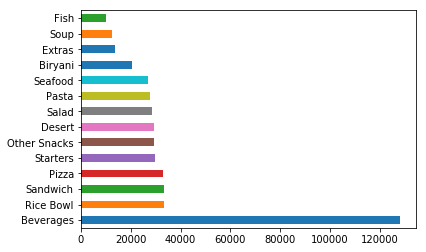

In [274]:
train_pd.category.value_counts().plot.barh()

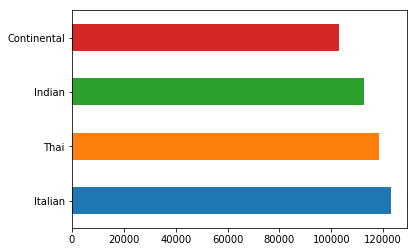

In [275]:
train_pd.cuisine.value_counts().plot.barh()

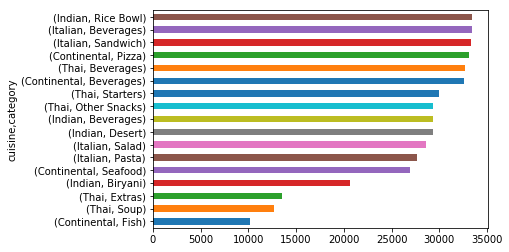

In [281]:
train_pd.groupby(["cuisine", "category"]).size().sort_values().plot.barh()

In [258]:
train_pd.loc[train_pd.email_homepage_feat_both == 1, 
                 ["center_id", "meal_id","num_order_change_by1", "price_change_by1"]].groupby(
    ["center_id", "meal_id"]).agg({"num_order_change_by1": ["mean", "count"], 
                                   "price_change_by1": ["mean", "count"]}).isnull().sum()

num_order_change_by1  mean     0
                      count    0
price_change_by1      mean     0
                      count    0
dtype: int64